<a href="https://colab.research.google.com/github/OdinProjectI/BU_CIS535/blob/main/CIS535_CaseStudyProject_Week9_Sofware_Package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
! apt-get --assume-yes update
! apt-get --assume-yes install freetds-dev freetds-bin
! apt-get --assume-yes install python-dev python-pip
! pip install pymssql

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pymssql
import warnings
import numpy as np

from typing import List, Dict

warnings.filterwarnings('ignore')

# **Software Package**
# BU_CIS535
CIS535 Case Study Project


# **Project Overview**
The case study project aims to revolutionize Bob's small business by leveraging cutting-edge technology and modern software development practices. The primary objective is to computerize Bob's business's essential elements, such as billing customers, viewing the material used for a specific project, and managing supplier payments, to enhance efficiency, accuracy, and overall business performance.

As a successful handyman business owner, Bob has manually managed various aspects, relying on traditional methods like pen and paper. However, as the business grows, these manual processes can become time-consuming, prone to errors, and challenging to maintain. To overcome these challenges and take Bob's business to the next level, I build a software package that integrates seamlessly with his existing workflow, using the following technology stacks:
* T-SQL: T-SQL, a powerful database language, to design a well-structured

and secure database that stores essential business data.

* AWS RDS: AWS RDS will provide the scalability, reliability, and cloud-based storage required to handle the increasing volume of data as the business expands.

* Google-Colab: A cloud-based interactive environment for data science to streamline data processing, generate insightful reports, and perform analytics, giving Bob the advantage of data-driven decision-making, enabling him to identify trends, manage finances effectively, and optimize operations.

The overall goal of this case study project is to increase efficiency and reduce manual workload, improve accuracy in billing and supplier management, and enhance financial visibility. Also, the cloud technologies (AWS & Google-Colab) will optimize his day-to-day operations and position Bob's handyperson business as a competitive force in the market.

# **How to use the Software Package**
    1. Connecting to the Colab Notebook
        1. Register your IP Address
            1.1. Email your IP address to your assigned administrator as described in the contract agreement.
        2. Accessing Google-Colab
            2.1. Go to the following URL https://colab.research.google.com/github/OdinProjectI/BU_CIS535/blob/main/CIS535_CaseStudyProject_Week9_Sofware_Package.ipynb
            2.2. Click on the "Sign In" button in the top right corner. You will be prompted to sign in with your Google account.
            2.3. Enter your Gmail credentials to sign in.
            2.4. After signing in, Google Colab will request your permission to access your Google Drive, which is necessary as Google Colab allows you to save and load notebooks directly from your Google Drive. Click on "Allow" to grant access.
            2.5. Once you've signed in and been granted access, you will be redirected to the Google Colab dashboard. You can access the collaborative Jupyter Notebook environment and interact with the MSSQL database from there.
    2. Documentation
        2.1. Tables
            2.1.1. Materials: The purpose of the material table is to store essential information about various materials used in a project.
            2.1.2. SupplierPayment: The purpose of the SupplierPayment table is to record and track payments made to suppliers for the materials or services they provide, manage financial transactions, ensure timely payment, and maintain a clear payment history with suppliers.
            2.1.3. SupplierInvoice: The purpose of the SupplierInvoice table is to store and manage invoices received from suppliers for materials or services provided and helps track payment obligations, ensure accurate billing, and maintain a record of supplier transactions.
            2.1.4. SupplierBilling: The purpose of the SupplierBilling table is to store and manage billing information related to the materials or services provided by the suppliers, keep track of billing details and amounts owed to the suppliers, and facilitate accurate payment processing.
            2.1.5. CustomerPayment: The purpose of the CustomerPayment table is to record and manage payments received from customers for products or services provided and keep track of customer transactions, ensure timely payments, and maintain a clear payment history with customers.
            2.1.6. CustomerInvoice: The purpose of the CustomerInvoice table is to record and manage payments received from customers for products or services provided, and helps to track customer transactions, ensure timely payments, and maintain a clear payment history with customers.
            2.1.7. CustomerBilling: The purpose of the CustomerBilling table is to store billing information for products or services provided to customers and generate invoices, track payments, and manage customer billing records efficiently.
            2.1.8. Repair: The purpose of the Repair table is to record repair requests for various items and helps track repair history, prioritize tasks, and efficiently manage maintenance activities.
            2.1.9. Bid: The purpose of the Bid Table is to store bids submitted by various entities for a specific project and facilitates bid comparison, decision-making, and contract, streamlining the procurement process.
            2.1.10. Customers: The purpose of the Customer table is to store essential information about individual customers or clients and help maintain customer details, cush as names, contact information, and transaction history, enabling efficient customer management and personalized services.
            2.1.11. NOTE: Follow the ERD diagram for clarification
        2.2. T-SQL Custom Function
            2.2.1. GetMaterials: T-SQL Function to list the names of the customers who provided bids last month. Also, this function simplifies the bid search query.
            2.1.2. SearchCustomersOutstandingBalance: T-SQL function to list all the customers with an outstanding balance greater than $500 or any given balance amount.
            2.1.3. GenerateCustomerInvoice: Bill remainder function that searches DB for current due dates based on a given month and year
        2.3. T-SQL View Table
            2.3.1. SupplierBillings: T-SQL view table to list all outstanding balances over a  thousand dollars.
        2.4. Report Generations
            2.4.1. Query to list the names of the customers who provided bids last month.
            2.4.2. Query to list all the customers with an outstanding balance (amount due to Bob) greater than five hundred dollars.
            2.4.3. Query to list all the suppliers where Bob has an outstanding balance of over a thousand dollars.
            2.4.4. Query to list all the material that was used for bids where the estimated hours for the bid were greater than forty hours.
            2.4.5. Query to list all the materials that Bob purchased from a specific supplier.
        2.5. Data Visualizations
            2.5.1. Visualize the monthly number of transactions.
            2.5.2. Visualize the billing history for a given season.

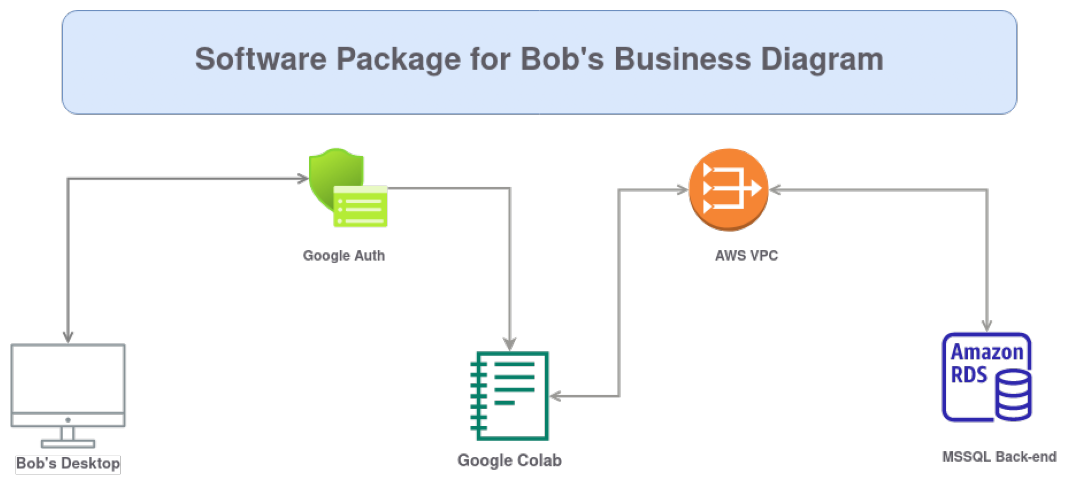

In [ ]:
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot()
ax.imshow(plt.imread("/content/drive/MyDrive/SoftwarePackageBob.png"))
ax.axis('off')

plt.tight_layout()

# **DB Schema**

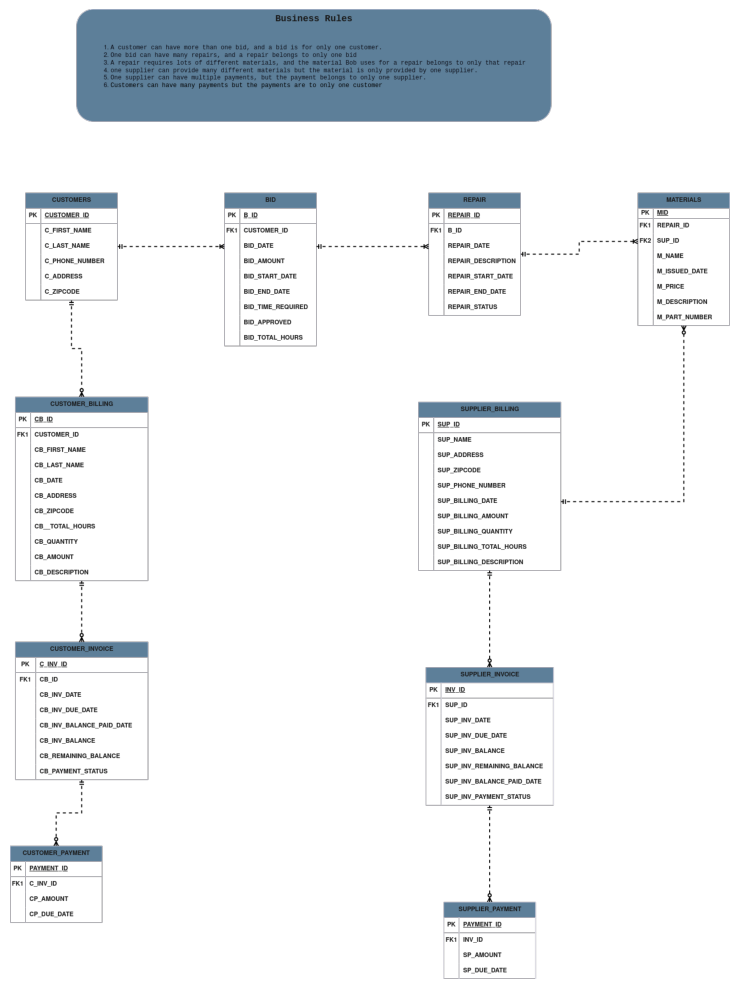

In [ ]:
fig = plt.figure(figsize=(35,10))
ax = fig.add_subplot()

ax.imshow(plt.imread("/content/drive/MyDrive/CIS535_Atmadja_Rio_Week3_CaseStudyProject.drawio.png"))
ax.axis('off')
plt.tight_layout()

# **Dashboard**
    - Software Package for Bob's Business

In [14]:
con: 'MSSQL' = pymssql.connect(user=os.environ['USER'],
                               password=os.environ['PASSWD'],
                               server=os.environ['SERVER'],
                               database=os.environ['DB'])
cursor = con.cursor()


## **Table Details**

In [83]:
tbl_names: 'DataFrame' = pd.read_sql("SELECT TOP 10 name FROM sysobjects WHERE FORMAT(crdate, 'yyyy-MM-dd') = '2023-07-31' AND name NOT LIKE '%FK%' AND name NOT LIKE '%PK%' AND name NOT LIKE '%DF%'  ORDER BY crdate DESC", con=con)
tbl_names.index = np.arange(1,11)
tbl_names.rename({'name': 'Table Name'}, axis=1)

,Table Name
1,SupplierBillings
2,GenerateCustomerInvoice
3,Materials
4,SupplierPayment
5,SupplierInvoice
6,SupplierBilling
7,CustomerPayment
8,CustomerInvoice
9,CustomerBilling
10,Repair


# **1. List the names of the customers who provided bids last month.**

In [ ]:
search_bid_query: str = """

/*
============================================================================================
Description: T-SQL Function to list the names of the customers who provided bids last month.
             Also, this function simplifies the bid search query.

Return:
    - A table with the following attributes:
        - customer_id
        - customer_first_name
        - customer_last_name
        - customer_phone_number
        - customer_address
        - bid_date
        - bid_start_date
        - bid_end_date
        - bid_total_hours
        - bid_time_required
============================================================================================

*/
CREATE FUNCTION SearchBidLastMonth()
RETURNS TABLE

RETURN

(
    SELECT
        c.customer_id,
        c.customer_first_name,
        c.customer_last_name,
        c.customer_phone_number,
        c.customer_address,
        b.bid_date,
        b.bid_start_date,
        b.bid_end_date,
        b.bid_total_hours,
        b.bid_time_required

    FROM Customers c
    JOIN Bid b ON b.customer_id = c.customer_id
    WHERE FORMAT(b.bid_date, 'yyyy-MM') = FORMAT(GETDATE(), 'yyyy-MM')
)
"""
cursor.execute(search_bid_query)
con.commit()

In [ ]:
pd.read_sql("SELECT * FROM SearchBidLastMonth()", con=con)

,customer_id,customer_first_name,customer_last_name,customer_phone_number,customer_address,bid_date,bid_start_date,bid_end_date,bid_total_hours,bid_time_required
0,21257,Jack,Butkus,(477)-655-1668,"3018 East Ave, Central Square NY 13036",2023-07-22,2023-05-07,2023-10-29,255,48
1,16346,Alex,Buchanan,(247)-142-8837,"69 Prospect Hill Road, East Windsor CT 6088",2023-07-22,2023-05-19,2023-10-29,65,48


# **2. List all the customers that have an outstanding balance (amount due to Bob) that is greater than $500.**

In [87]:
outstanding_balance_query: str = """
/*
=================================================================================================================
Description: T-SQL function to list all the customers with an outstanding balance greater than $500 or any given
            balance amount.
Return:
    - customer_id
    - customer_billing_id,
    - customer_billing_first_name
    - customer_billing_last_name
    - customer_billing_address
    - customer_billing_date
    - customer_billing_description
    - customer_billing_amount
=================================================================================================================
*/
CREATE FUNCTION SearchCustomersOutstandingBalance (@balance INT)
RETURNS TABLE
AS
RETURN
 (
    SELECT
        c.customer_id,
        cb.customer_billing_id,
        cb.customer_billing_first_name,
        cb.customer_billing_last_name,
        cb.customer_billing_address,
        cb.customer_billing_date,
        cb.customer_billing_description,
        cb.customer_billing_amount

    FROM Customers c
    JOIN CustomerBilling cb ON cb.customer_id = c.customer_id
    WHERE cb.customer_billing_amount > @balance
)
"""
cursor.execute(outstanding_balance_query)
con.commit()

In [ ]:
pd.read_sql("SELECT * FROM SearchCustomersOutstandingBalance(500)", con=con)

,customer_id,customer_billing_id,customer_billing_first_name,customer_billing_last_name,customer_billing_address,customer_billing_date,customer_billing_description,customer_billing_amount
0,21782,4101,Arnie,Weinmeister,"3100 Hough Rd, Florence AL 35630",2023-07-10,Handyman Construction,5927
1,21077,4406,Paul,Warfield,"1970 S University Blvd, Mobile AL 36609",2023-06-29,Handyman Business Cards,6474
2,21257,8194,Jimmy,Conzelman,"70 Pleasant Valley Street, Methuen MA 1844",2023-04-21,Home Repair And Remodeling,14509
3,15942,8220,Bud,Grant,"1000 State Route 36, Hornell NY 14843",2023-08-02,Remodeling Tacoma,5950
4,21740,8290,Anthony,Muñoz,"70 Pleasant Valley Street, Methuen MA 1844",2023-09-06,Home Maintenance,1246
5,20857,8312,Dante,Lavelli,"312 Palisades Blvd, Birmingham AL 35209",2023-03-29,Handyman Matters,12577
6,15111,8322,Harry,Carson,"970 Torringford Street, Torrington CT 6790",2023-02-11,Handyman Hardware,2171
7,21648,8325,Bob,Lilly,"550 Providence Hwy, Walpole MA 2081",2023-11-26,Remodeling Seattle Wa,13773
8,22344,8355,Rosey,Brown,"3176 South Eufaula Avenue, Eufaula AL 36027",2023-11-14,Polyclinic Seattle,5116
9,22763,8401,Cliff,Battles,"85 Crooked Hill Road, Commack NY 11725",2023-07-10,Northern Handyman,515


# **3. List all the suppliers where Bob has an outstanding balance that is greater than $1,000.**

In [75]:
supplier_query: str = """
-- View table to list all outstanding balance that is greater than $1,000
CREATE VIEW SupplierBillings AS
(SELECT
    sb.supplier_id,
    sb.supplier_name,
    sb.supplier_address,
    sb.supplier_zipcode,
    sb.supplier_phone_number,
    sb.supplier_billing_date,
    sb.supplier_billing_description

FROM SupplierBilling sb
WHERE sb.supplier_billing_amount > 1000)
"""

cursor.execute(supplier_query)



In [76]:
pd.read_sql("SELECT * FROM SupplierBillings", con=con)

,supplier_id,supplier_name,supplier_address,supplier_zipcode,supplier_phone_number,supplier_billing_date,supplier_billing_description
0,3008,Woodstock Home & Hardware,"220 Salem Turnpike, Norwich CT 6360",36203,(372)-101-7164,2023-03-17,Carpentry
1,3058,Glenn’s True Value,"3018 East Ave, Central Square NY 13036",2339,(556)-236-3586,2023-09-06,Handyman Services
2,3065,Stine Lumber,"1972 Hwy 431, Boaz AL 35957",1364,(435)-725-3207,2023-10-10,Home Improvement Contractors
3,3076,Ace Alameda Station,"279 Troy Road, East Greenbush NY 12061",14411,(478)-327-1838,2023-07-22,Handyman House
4,3077,McFadden-Dale Hardware,"970 Torringford Street, Torrington CT 6790",2338,(547)-067-3883,2023-11-02,Handyman Connection
5,3141,A few cool hardware stores,"1537 Hwy 231 South, Ozark AL 36360",35064,(287)-217-2740,2023-06-17,Loews Home Improvement
6,3198,L.L. Green’s,"7855 Moffett Rd, Semmes AL 36575",11953,(344)-564-7011,2023-02-11,Seattle Contractors
7,3206,Kohl’s Hardware & Lumber,"9248 Parkway East, Birmingham AL 35206",2081,(626)-014-7247,2023-05-14,Remodeling
8,3222,Gosline’s Hardware,"1100 New Haven Road, Naugatuck CT 6770",35124,(117)-040-3321,2023-05-14,Home Maintenance
9,3319,Stine Lumber,"145 Kelley Blvd, Millbrook AL 36054",1905,(445)-050-1006,2023-03-17,Bathroom Remodel Seattle


# **4. List all the material that was used for bids where the estimated hours for the bid was greater than 40 hours.**

In [ ]:
material_query: str = """
    SELECT
        m.material_name,
        m.material_price,
        m.material_description,
        m.material_part_number

    FROM Bid b
    JOIN Repair r ON r.bid = b.bid
    JOIN Materials m ON m.repair_id = r.repair_id
    WHERE b.bid_time_required > 40

"""

pd.read_sql(material_query, con=con)

,material_name,material_price,material_description,material_part_number
0,Roofing Underlayment,11518.0,Fix/Upgrade Gravel,13237
1,Electrical wires,2554.0,Fix/Upgrade Drywall,15843
2,Insulation,1355.0,Fix/Upgrade Roofing Shingles,18743
3,Plumbing Pipes,7661.0,Fix/Upgrade Electrical wires,14490
4,Siding,4489.0,Fix/Upgrade Drywall,2834
5,Circuit breakers and panels,902.0,Fix/Upgrade Rebar,11510
6,Trim,7786.0,Fix/Upgrade Insulation,7465
7,Nails,7527.0,Fix/Upgrade Fittings,3717
8,Flooring Materials,13577.0,Fix/Upgrade Drywall,7665
9,Insulation,13374.0,Fix/Upgrade Outlets and switches,16172


# **5. List all the material that Bob purchased from a specific supplier (Note: you can decide on the supplier but there should only be one supplier).**

In [ ]:
list_materials: str = """
CREATE FUNCTION GetMaterials(@supplier_name VARCHAR(255) )
RETURNS TABLE

AS

RETURN (
    SELECT
        m.material_name,
        m.material_price,
        m.material_part_number

    FROM SupplierBilling sb
    JOIN Materials m ON m.supplier_id = sb.supplier_id
    WHERE sb.supplier_name = @supplier_name

)

"""

cursor.execute(list_materials)
con.commit()

In [ ]:
pd.read_sql(f"SELECT g.material_name, g.material_price, g.material_part_number FROM GetMaterials('Home Hardware & Supply') g", con=con)

,material_name,material_price,material_part_number
0,Lumber,1211.0,12234


# **Miscellaneous Quries**
    - Generate Invoice (Bill the customer based on customer_id)

In [69]:
query: str = """

/*
===========================================================================================================
Description: Bill remainder function that searches DB for current due dates based on a given month and year
Params @month: given a valid month
       @year: given a valid year
===========================================================================================================

*/

CREATE FUNCTION GenerateCustomerInvoice(@month INT, @year INT)
RETURNS TABLE
AS

RETURN (

    SELECT
        CONCAT(c.customer_first_name, ' ', c.customer_last_name) AS "Customer Name",
        CONCAT( cb.customer_billing_address, ' ', cb.customer_billing_zipcode) AS "Billing Address",
        c.customer_phone_number AS "Phone Number",
        ci.customer_invoice_balance AS "Amount Due Now",
        ci.customer_remaining_balance AS "Remaining Balance",
        ci.customer_invoice_due_date AS "Due Date",
        m.material_description  AS "Material Description",
        r.repair_description AS "Job Description"

    FROM Customers c
    JOIN CustomerBilling cb ON cb.customer_id = c.customer_id
    JOIN CustomerInvoice ci ON ci.customer_billing_id = cb.customer_billing_id
    JOIN Bid b ON b.customer_id = c.customer_id
    JOIN Repair r ON r.bid = b.bid
    JOIN Materials m ON m.repair_id = r.repair_id
    WHERE YEAR(ci.customer_invoice_due_date) = @year AND MONTH(ci.customer_invoice_due_date) = @month

    -- ORDER BY ci.customer_invoice_balance DESC

)

"""
cursor.execute(query)
con.commit()

In [74]:
pd.read_sql("SELECT * FROM GenerateCustomerInvoice(7,2023) ORDER BY \"Due Date\" DESC ", con=con)

,Customer Name,Billing Address,Phone Number,Amount Due Now,Remaining Balance,Due Date,Material Description,Job Description
0,Michael Boselli,"1970 S University Blvd, Mobile AL 36609 14456",(833)-621-2618,11934.0,1760.5,2023-07-27,Fix/Upgrade Plumbing Pipes,Mrhandyman.Com
1,Lou Matson,"591 Memorial Dr, Chicopee MA 1020 6776",(682)-316-5723,2766.0,7984.9,2023-07-15,Fix/Upgrade Paint,Handyman Rates
2,Bulldog Matthews,"70 Pleasant Valley Street, Methuen MA 1844 35043",(721)-215-8278,9213.0,3385.2,2023-07-04,Fix/Upgrade Junction boxes,Home Improvement Contractors


# **Data Visualization**: Business Transactions

In [129]:
view_tbl: 'DataFrame' = pd.read_sql("SELECT * FROM SupplierBillings", con=con) # call the custom view table to view number of transactions
view_tbl['month_name'] = view_tbl['supplier_billing_date'].apply(lambda row: row.month_name() )
months,freqs = zip(*view_tbl.groupby('month_name').size().to_dict().items())

store_transc: 'DataFrame' = pd.merge(left=pd.DataFrame( pd.Series(pd.date_range(start="2021-01-01", end="2022-01-01", freq='M')).apply(lambda row: row.month_name() ), columns=['Month']),
                                        right=pd.DataFrame({'Month': list(months), 'Number of Transc': list(freqs)}),
                                        how='left',
                                        on="Month").replace({np.nan:0}).set_index("Month").astype(int)

store_transc

,Number of Transc
Month,
January,3
February,3
March,7
April,0
May,2
June,3
July,1
August,2
September,2


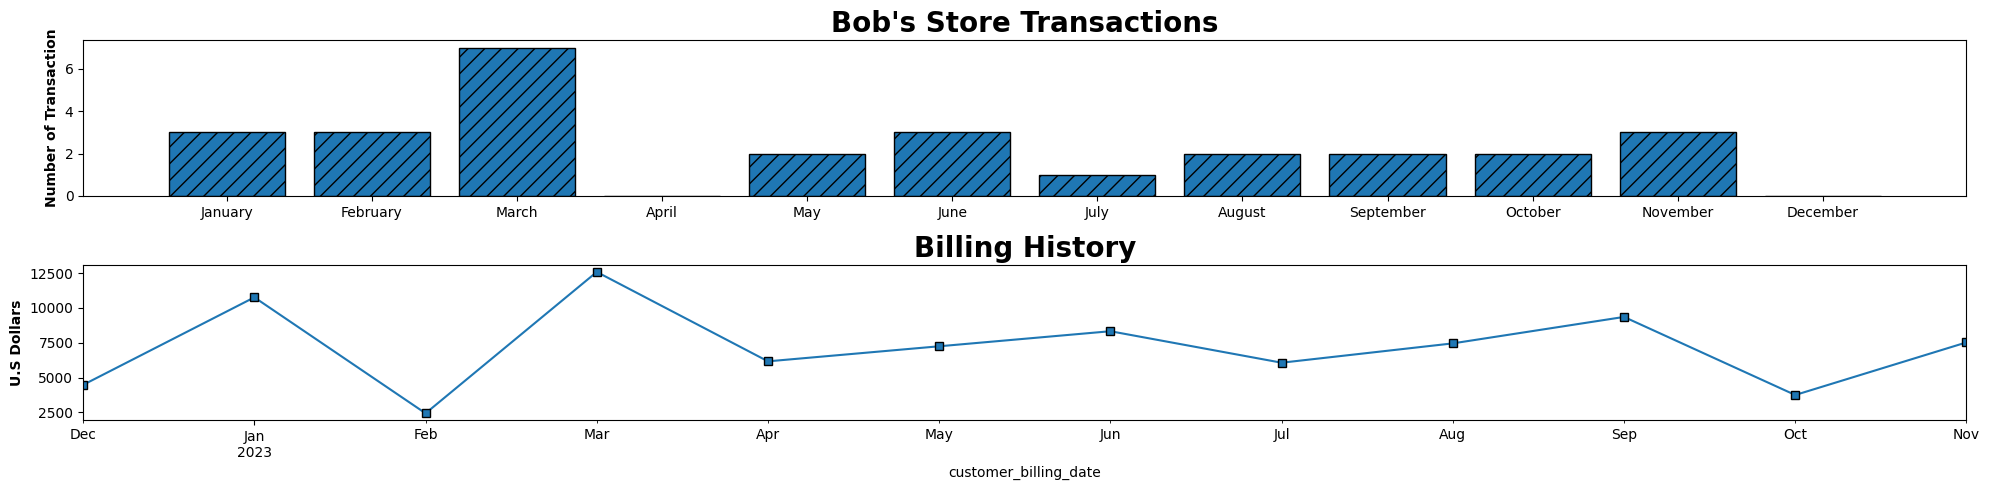

In [154]:
months, n_transc = zip(*list(store_transc.to_dict().values())[0].items())
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,1,1)
ax.bar(x=list(months), height=list(n_transc), edgecolor='k', hatch='//')
ax.set_ylabel("Number of Transaction", fontweight='bold')
ax.set_title("Bob's Store Transactions", fontweight='bold', fontsize=20)

ax = fig.add_subplot(2,1,2)
outstanding_balance: 'DataFrame' = pd.read_sql("SELECT * FROM SearchCustomersOutstandingBalance(0)", con=con) # call the built function to view customer outstanding balance
outstanding_balance.set_index('customer_billing_date').sort_index()['customer_billing_amount'].resample("M").mean().interpolate().plot(figsize=(20,5) ,marker='s', mec='black', ax=ax)
ax.set_title("Billing History", fontweight='bold', fontsize=20)
ax.set_ylabel("U.S Dollars", fontweight='bold')

plt.tight_layout()

# **Generate Spread Sheets**

In [84]:
pd.read_sql("SELECT * FROM GenerateCustomerInvoice(7,2023) ORDER BY \"Due Date\" DESC ", con=con).to_excel("CustomerInvoiceJuly2023.xlsx")